In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### IOU

In [2]:
def calculate_iou(true_mask, predicted_mask):
    # Convert true mask to gray scale
    true_mask_gray = cv2.cvtColor(true_mask, cv2.COLOR_BGR2GRAY)
    # Convert predicted mask to gray scale
    predicted_mask_gray = cv2.cvtColor(predicted_mask, cv2.COLOR_BGR2GRAY)
    
    intersection = np.logical_and(true_mask_gray, predicted_mask_gray)
    union = np.logical_or(true_mask_gray, predicted_mask_gray)

    iou = np.sum(intersection) / np.sum(union)
    return iou

### Dice

In [3]:
def calculate_dice_score(true_mask, predicted_mask):
    # Ensure the masks are binary
    true_mask_binary = true_mask > 0
    predicted_mask_binary = predicted_mask > 0
    
    intersection = np.logical_and(true_mask_binary, predicted_mask_binary)

    dice_score = 0

    # Calculate Dice score only if both true and predicted masks are present
    if np.sum(true_mask_binary) > 0 and np.sum(predicted_mask_binary) > 0:
        # Calculate intersection area
        intersection_area = np.sum(intersection)
        # Calculate area of true mask
        true_area = np.sum(true_mask_binary)
        # Calculate area of predicted mask
        predicted_area = np.sum(predicted_mask_binary)
        
        # Calculate Dice score
        dice_score = 2 * intersection_area / (true_area + predicted_area)
    else:
        dice_score = 0

    return dice_score

### pixel wise accuracy

In [4]:
#pixel wise accuracy

def calculate_pixel_wise_accuracy(true_mask, predicted_mask):
    
    #convert true mask to gray scale
    true_mask_gray=cv2.cvtColor(true_mask,cv2.COLOR_BGR2GRAY)
    #convert predicted mask to gray scale
    predicted_mask_gray=cv2.cvtColor(predicted_mask,cv2.COLOR_BGR2GRAY)
    #calculate pixel wise accuracy
    #number of pixels in true mask
    true_positive=np.sum((true_mask_gray==255) & (predicted_mask_gray==255))
    false_positive=np.sum((true_mask_gray==0) & (predicted_mask_gray==255))
    false_negative=np.sum((true_mask_gray==255) & (predicted_mask_gray==0))
    true_negative=np.sum((true_mask_gray==0) & (predicted_mask_gray==0))


    #pixel wise accuracy
    pixel_wise_accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)

    return pixel_wise_accuracy

### Name of folder to eval

In [5]:
folder_name='SAM_predictions_BBox'

In [6]:
def calculate_metrics(benign_gt_dir, benign_predictions_dir,csv_file_name):
    list_of_benign_predictions_dir = os.listdir(benign_predictions_dir)

    df = pd.DataFrame(columns=['File', 'IOU', 'Dice Score', 'Pixel Wise Accuracy'])

    for files in list_of_benign_predictions_dir:
        # read true mask
        #print(files)
        true_mask = cv2.imread(os.path.join(benign_gt_dir, files.replace('_mask_prediction.png', '_mask.png')))
        # read predicted mask
        predicted_mask = cv2.imread(os.path.join(benign_predictions_dir, files))

        # calculate iou
        iou = calculate_iou(true_mask, predicted_mask)
        # calculate dice score
        dice_score = calculate_dice_score(true_mask, predicted_mask)
        # calculate pixel wise accuracy
        pixel_wise_accuracy = calculate_pixel_wise_accuracy(true_mask, predicted_mask)

        df.loc[len(df)] = [files, iou, dice_score, pixel_wise_accuracy]


    # save the dataframe to a csv file
    df.to_csv(csv_file_name, index=False)
    
    print('Metrics saved to ',csv_file_name)
    average_dice_score=np.mean(df['Dice Score'])
    average_iou=np.mean(df['IOU'])
    average_pixel_wise_accuracy=np.mean(df['Pixel Wise Accuracy'])
    
    return average_dice_score,average_iou,average_pixel_wise_accuracy

## only box prompt

In [9]:
benign_predictions_dir=os.path.join('..', folder_name, 'valid' ,'benign')
benign_gt_dir=os.path.join('..','..','Dataset_BUSI_with_GT','benign')

average_dice_score,average_iou,average_pixel_wise_accuracy=calculate_metrics(benign_gt_dir,benign_predictions_dir,os.path.join('..',folder_name,'valid','benign_metrics.csv'))

print('Average Dice Score:',average_dice_score)
print('Average IOU:',average_iou)
print('Average Pixel Wise Accuracy:',average_pixel_wise_accuracy)

Metrics saved to  ../SAM_predictions_BBox/valid/benign_metrics.csv
Average Dice Score: 0.18470375928731056
Average IOU: 0.14369781391632624
Average Pixel Wise Accuracy: 0.8201224428419868


In [13]:
malignant_predictions_dir=os.path.join('..', folder_name, 'train', 'benign')
malignant_gt_dir=os.path.join('..', '..','Dataset_BUSI_with_GT','benign')

average_dice_score,average_iou,average_pixel_wise_accuracy=calculate_metrics(malignant_gt_dir,malignant_predictions_dir,os.path.join('..',folder_name,'train','malignant_box_metrics.csv'))

print('Average Dice Score:',average_dice_score)
print('Average IOU:',average_iou)
print('Average Pixel Wise Accuracy:',average_pixel_wise_accuracy)

[ WARN:0@579.676] global loadsave.cpp:248 findDecoder imread_('../../Dataset_BUSI_with_GT/benign/benign (195)_mask_2_mask.png'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


[ WARN:0@631.933] global loadsave.cpp:248 findDecoder imread_('../../Dataset_BUSI_with_GT/benign/benign (195)_mask_2_mask.png'): can't open/read file: check file path/integrity
[ WARN:0@631.934] global loadsave.cpp:248 findDecoder imread_('../SAM_predictions_BBox/valid/benign/benign (195)_mask_prediction.png'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

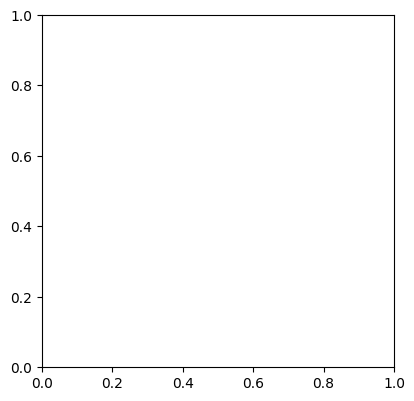

In [14]:
#load image ../../Dataset_BUSI_with_GT/benign/benign (195)_mask_2_mask.png

true_mask=cv2.imread('../../Dataset_BUSI_with_GT/benign/benign (195)_mask_2_mask.png')
predicted_mask=cv2.imread('../SAM_predictions_BBox/valid/benign/benign (195)_mask_prediction.png')

#plot the images
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(true_mask)
DLCV_project/Dataset_BUSI_with_GT/benign/benign (195)_mask_2.png


## with box and point prompt

In [30]:
benign_gt_dir=os.path.join('..','Dataset_BUSI_with_GT','benign')
benign_point_box_dir=os.path.join('..',folder_name,'SAM_predictions_BBoxPoint','benign')

average_dice_score,average_iou,average_pixel_wise_accuracy=calculate_metrics(benign_gt_dir,benign_point_box_dir,os.path.join('..',folder_name,'benign_point_box_metrics.csv'))

print('Average Dice Score:',average_dice_score)
print('Average IOU:',average_iou)
print('Average Pixel Wise Accuracy:',average_pixel_wise_accuracy)

Metrics saved to  ..\BreastSAM impl\benign_point_box_metrics.csv
Average Dice Score: 0.8771654120817105
Average IOU: 0.79010434918551
Average Pixel Wise Accuracy: 0.9844730317006107


In [31]:
malignant_gt_dir=os.path.join('..','Dataset_BUSI_with_GT','malignant')
malignant_point_box_dir=os.path.join('..',folder_name,'SAM_predictions_BBoxPoint','malignant')

average_dice_score,average_iou,average_pixel_wise_accuracy=calculate_metrics(malignant_gt_dir,malignant_point_box_dir,os.path.join('..',folder_name,'malignant_point_box_metrics.csv'))

print('Average Dice Score:',average_dice_score)
print('Average IOU:',average_iou)
print('Average Pixel Wise Accuracy:',average_pixel_wise_accuracy)


Metrics saved to  ..\BreastSAM impl\malignant_point_box_metrics.csv
Average Dice Score: 0.8304638058228664
Average IOU: 0.7155563276327351
Average Pixel Wise Accuracy: 0.9551953264603636


### Point 

In [32]:
benign_gt_dir=os.path.join('..','Dataset_BUSI_with_GT','benign')
benign_point_box_dir=os.path.join('..',folder_name,'SAM_predictions_Point','benign')

average_dice_score,average_iou,average_pixel_wise_accuracy=calculate_metrics(benign_gt_dir,benign_point_box_dir,os.path.join('..',folder_name,'benign_point_metrics.csv'))

print('Average Dice Score:',average_dice_score)
print('Average IOU:',average_iou)
print('Average Pixel Wise Accuracy:',average_pixel_wise_accuracy)

Metrics saved to  ..\BreastSAM impl\benign_point_metrics.csv
Average Dice Score: 0.6771114339553682
Average IOU: 0.5896810091898083
Average Pixel Wise Accuracy: 0.896623810514078


In [33]:
malignant_gt_dir=os.path.join('..','Dataset_BUSI_with_GT','malignant')
malignant_point_box_dir=os.path.join('..',folder_name,'SAM_predictions_Point','malignant')

average_dice_score,average_iou,average_pixel_wise_accuracy=calculate_metrics(malignant_gt_dir,malignant_point_box_dir,os.path.join('..',folder_name,'malignant_point_metrics.csv'))

print('Average Dice Score:',average_dice_score)
print('Average IOU:',average_iou)
print('Average Pixel Wise Accuracy:',average_pixel_wise_accuracy)


Metrics saved to  ..\BreastSAM impl\malignant_point_metrics.csv
Average Dice Score: 0.5883291313479885
Average IOU: 0.46138997781788166
Average Pixel Wise Accuracy: 0.8071209403626128
